<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png"><br />

Created by [Nathan Kelber](http://nkelber.com) and Zhuo Chen for [JSTOR Labs](https://labs.jstor.org/) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.<br />
___

# Python Intermediate 3

**Description:** This notebook describes how to:
* Use the Python `pathLib` library to manipulate files

**Use Case:** For Learners (Detailed explanation, not ideal for researchers)

**Difficulty:** Intermediate

**Completion Time:** 90 minutes

**Knowledge Required:** 
* Python Basics ([Start Python Basics I](../basic/python-basics-1.ipynb))

**Knowledge Recommended:**
* [Python Intermediate 1](./python-intermediate-1.ipynb)
* [Python Intermediate 2](./python-intermediate-2.ipynb)

**Data Format:** Text (.txt)

**Libraries Used:** `pathlib`

**Research Pipeline:** None
___

In [1]:
# Import pathlib library
from pathlib import Path

# Import a tokenizer
from nltk.tokenize import TreebankWordTokenizer

# Import a Counter Objects for counting words
from collections import Counter

# Load the NLTK stopwords list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Import the CSV module
import csv

# Import libraries for making wordclouds
from wordcloud import WordCloud
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
### Download Sample Files for this Lesson
import urllib.request
from pathlib import Path

# Check if a data folder exists. If not, create it.
data_folder = Path('../data/')
data_folder.mkdir(exist_ok=True)

download_urls = [
    'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/sample.txt',
    'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/books.zip',
    'https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/sample_cloud.png'
]

for url in download_urls:
    urllib.request.urlretrieve(url, '../data/' + url.rsplit('/', 1)[-1])

import zipfile
with zipfile.ZipFile("../data/books.zip", "r") as zip_ref:
    zip_ref.extractall("../data/books")

bookzip_path = Path.cwd() / '..' / 'data' / 'books.zip'
bookzip_path.unlink()

print('Sample files ready.')

Sample files ready.


## A tree structure of filesystem
<center><img src='https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/filesystem_tree.png' width=700></center>

## An Introduction to `pathlib`

Python Intermediate 2 describes the way to open, read, and write files. The built-in module `pathlib` is the best way to connect to the file system so your code can work seamlessly with files and directories, even across different operating systems. For example, `pathlib` can help you accomplish tasks like:

* Find whether a particular file or directory already exists
* Simplify the code for reading and writing to files
* Find information about a file, including its extension
* Iterate a process over a large group of files in a directory (including subdirectories)

### The `pathlib` module improves on `os`: 

Python also includes an older module named `os` for working with filepaths. The `os` module is not deprecated, but most Python programmers will tell you to move to the newer module. The `os` module treats paths as strings which leads to a lot of issues, especially when working with different operating systems. `pathlib` has a much nicer syntax for things like joining paths, creating directories, stemming paths, finding parents, and iterating over files. Ultimately, many of the same tasks can be done with `os`, but the code is often longer and the syntax tends to be more difficult to read and write. If you are using someone else's code that contains `os` in it, it is worth learning `os` to understand the code. For most practical purposes, however, `pathlib` is superior and it is a good idea to write new code using `pathlib` instead of `os`.

## Finding and Defining Paths

We can find the current working directory by using the `.cwd()` method. (This is similar to the unix command `pwd`.)

In [ ]:
# Get the current working directory
Path.cwd()

Since Constellate runs on a linux server, we will get an path object that is a PosixPath. The directories will end in forward slashes `/`, whereas on a windows machine a path will use backward slashes, e.g. `C:\Windows\`.

We can create a path object at any time by using an assignment statement and passing a string into the `Path()` function. The path can be absolute, starting at the root of the operating system filesystem, or it can be relative, starting from the current working directory.

In [4]:
# Create a path object based on a string from a relative path
file_path = Path('../data/sample.txt')

We have created a path object, not simply a string. The path object has a lot more flexibility than a traditional string (like what is used in the `os` module). It allows us to create code that is easier to adapt for different operating systems since we do not have to be concerned about formatting the string with slashes in the correct direction and other technical issues that diverge from one operating system to another.

In [5]:
# We have created a Path object, not simply a string
type(file_path)

pathlib.PosixPath

We can also use the `print()` function on the path object.

In [6]:
# Print out the path object
print(file_path)

../data/sample.txt


The `.resolve()` method will take a relative path object and create an abolute path object. The absolute path is the full path from the root of the filesystem. On a Mac or Linux, this is simply `/`. On a Windows computer, it is usually `C:\`.

In [ ]:
# Getting the full path using .resolve()
# Returns a path object

file_path.resolve()

We can also build a path based on strings separated by slashes. (This is a much more readable way to join paths than the `os` module.)

In [ ]:
# Building another path off the current working directory
# Using the slash notation

file_path = Path.cwd() / '..' / 'data' / 'sample.txt'
print(file_path)

When we create a path object, there is no check to make sure it points to an actual file or directory. We can check if the path exists with the `.exists()` method.

In [9]:
# Check if the path exists
# Works for files and directories
file_path.exists()

True

<h3 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h3>

Create a new path object `new_path` that points to a filed called `sample.html` in the `data` folder. Confirm the file does not exist using the `.exists()` method.

In [10]:
# Checking if data/sample.html exists
# Call the new path object new_path


Now, let's get a better understanding of the relative path and the absolute path. First, let's create a `test.txt` file in the current directory and write some text in it. 

Let's open the file and read in the data. 

In [ ]:
# Open the text file and read the data
with open('test.txt', 'r') as f:
    print(f.read())

Next, let's delete the `test.txt` file and create a `test.txt` file in the parent directory of the current directory `constellate-notebooks`. If you try to open the file with the same code from the previous code cell, what will happen? 

In [ ]:
# Open the test file in the parent directory using the same code
with open('test.txt', 'r') as f:
    print(f.read())

One thing you could do is to give the absolute path instead.

In [ ]:
# Open the test file using the absolute path
with open('/home/jovyan/test.txt', 'r') as f:
    print(f.read())

Or, you can use the relative path in the following way. 

In [ ]:
# Open the test file using the relative path
with open('../test.txt', 'r') as f:
    print(f.read())

## Checking if a Path Points to an Existing File or Directory

| Method | Effect |
|---|---|
| `.is_file()` | Return a Boolean True/False if the path points at an existing file |
| `.is_dir()` | Return a Boolean True/False if the path points at an existing directory |

In [13]:
# Check whether path is a file
# Returns a Boolean

file_path.is_file()

True

In [14]:
# Check whether path is a directory
# Returns a Boolean

file_path.is_dir()

False

## Path Attributes

A path object also has useful attributes. Unlike the methods above which end in parentheses `()`, attributes do not use parentheses. (We can think of a method as function, since it ends in `()`, that additionally takes an object before the dot notation. These functions usually transform or do some kind of action that may need take arguments in the parentheses. An attribute, on the other hand, is more like a property of the object so it does not require parentheses.)

| Attribute | Information Returned |
|---|---|
| `.parent` | Return a path object for the parent directory |
| `.parents`[x] | Return a path object for parents x generations higher |
| `.name` | Return a string containing the file name with extension |
| `.stem` | Return a string containing the file name without extension |
| `.suffix` | Return a string containing the file extension |

In [ ]:
# Get the parent of the path
# Returns a path object

file_path.parent

In [ ]:
# Finding the grandparent of the path using .parent twice
# Returns a path object
# If the path was specified from a relative path, 
# you may need to use .resolve() to get the absolute path first

file_path.parent.parent

In [ ]:
# Getting even deeper into the path
# Finding the grandparent of the full path using parents with index
# Returns a path object

file_path.parents[4] # Try changing the index

In [18]:
# Return just the name of the file or folder
# Returns a string
file_path.name

'sample.txt'

In [19]:
# Return just the name of the file without extension
# Returns a string

file_path.stem

'sample'

In [20]:
# Return just the extension/suffix
# Returns a string

file_path.suffix

'.txt'

## Creating Files and Directories

To create a new file or directory, first create the desired path object then use the appropriate method:

* `.touch()` will create a new file
* `.mkdir()` will create a new directory

In [21]:
# Create a new file

new_file_path = Path.cwd() / '..' /'data' / 'new_file.txt'
new_file_path.touch()

In [22]:
# Create a new directory

new_dir_path = Path.cwd() / '..' /'data' / 'new_directory'

# Create the directory
new_dir_path.mkdir(exist_ok = True) # The exist_ok = True parameter does not raise errors if directory exists

## Removing Files and Directories

To remove a file or directory, first create the path object then use the appropriate method:

* `.unlink()` will delete a file
* `.rmdir()` will delete a directory


In [23]:
# Remove a file

new_file_path.unlink()

In [24]:
# Remove a directory

new_dir_path.rmdir()

**Note: There is no method in Pathlib to recursively delete directories. In that case, you may want to import the module `shutil` and use the `.rmtree()` method: `shutil.rmtree(path)`.**

## Rename a File or Directory

To rename a file, you will need two path objects: the original path object and a new path object with the new name. The syntax looks like:

`old_path.rename(new_path)`

In [25]:
# Create an original file for this example

old_path = Path.cwd() / '..' /'data' / 'original_file.txt'
old_path.touch()

In [ ]:
# Rename the original file with `.rename()`
# On Windows, if the renamed file already exists an error will occur
# On Unix, if the renamed file already exists the file will be overwritten silently

new_path = Path.cwd() / '..' /'data' / 'renamed_file.txt'
old_path.rename(new_path)

## Open, Read, and Write to Text Files

Path objects work with the context manager `with open`. Instead of passing a string into the `open()` function, we can add the path object onto the front of a `.open()` method.

In [27]:
# Opening the file with a context manager
# and the `.open()` method
# The 'r', read only mode, argument is optional with `.open()`

with file_path.open() as f:
    print(f.read())

A text file can have many words in it
These words are written on the second line
Third line
Fourth line
Fifth line
Sixth line
Seventh line
Eighth line
Ninth line
Tenth line. This is the end of the text file!


<h3 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h3>

In the directory `data/books/`, there is a copy of Bram Stoker's Dracula from Project Gutenberg called `dracula_bram_stoker.txt`. Create a path object pointing to the file. Then open the file and print out the first 5000 characters.

For a tougher challenge, print out the first 500 lines. (The `.readlines()` method will return a list whose elements are each line of the document.)

In [28]:
# Print out 5000 characters of Bram Stoker's Dracula


In [29]:
# Print out 500 lines of Bram Stoker's Dracula


## Quickly Reading or Writing a File

If you are reading a small text file, then there is an even shorter way to read the file using a path object: `.read_text()`. This method opens the file, creates a string from the file object contents, and then closes the file object automatically.

In [30]:
# Using the read_text method
# Returns a string
print(file_path.read_text())

A text file can have many words in it
These words are written on the second line
Third line
Fourth line
Fifth line
Sixth line
Seventh line
Eighth line
Ninth line
Tenth line. This is the end of the text file!


There is also a fast method for writing to a file using a path object: `.write_text()`. This method opens the file object in write mode, writes a string to the file, and then closes it automatically. *Be careful with this method since it will overwrite any existing files!*

In [31]:
# Create a new file

new_file_path = Path.cwd() / '..' /'data' / 'new_file.txt'

# Write to a file
# This overwrites the file if it already exists

new_file_path.write_text('Hello World!')
print(new_file_path.read_text())

Hello World!


<h4 style="color:red; display:inline">Coding Challenge! &lt; / &gt; </h4>

Create a new file and add Shakespeare's Sonnet VI from the `sonnet_string`.
   
For a greater challenge, write a program that will print the line numbers at the beginner of each line.

For an even greater challenge, print out the rhyme scheme at the end of each line: `ababcdcdefefgg`

In [32]:
# Create a file that contains the sonnet string below
# Open the file and print it out line by line
# At the beginning of each line, print the appropriate line number

sonnet_string = """Then let not winter's ragged hand deface,
In thee thy summer, ere thou be distilled:
Make sweet some vial; treasure thou some place
With beauty's treasure ere it be self-killed.
That use is not forbidden usury,
Which happies those that pay the willing loan;
That's for thy self to breed another thee,
Or ten times happier, be it ten for one;
Ten times thy self were happier than thou art,
If ten of thine ten times refigured thee:
Then what could death do if thou shouldst depart,
Leaving thee living in posterity?
   Be not self-willed, for thou art much too fair
   To be death's conquest and make worms thine heir."""


## Gathering a List of Files with `.iterdir()` and `.rglob()`
It is common to gather a list of files in a directory (or set of directories) in order to excecute code on each one at a time. If all the files are in a single directory, then

In [ ]:
# Use .iterdir() to iterate over files in a directory

input_dir = Path.cwd() / '..' /'data' / 'books'
for file in input_dir.iterdir():
    print(file)

In [ ]:
# Use .iterdir() to iterate over files in a directory
# Checking for a particular extension
# Only works for a single directory!

for file in input_dir.iterdir():
    if file.suffix == '.txt':
        print(file)

The `.iterdir()` method will work on a single directory, but if you have multiple nested directories then you can use the `.rglob()` method. Be careful with this method, however, since if there are a lot of nested folders it could take a very long time to process the whole directory tree.

In [ ]:
# Use glob to iterate over all files including subfolders

for file in input_dir.rglob("*.txt"):
    print(file)

## Examples

### Tokenize a Directory of Texts and Find Most Common Words

In [36]:
def tokenize_and_count(text):
    """Take in a string and convert into a list of token strings.
    Remove symbol tokens. Remove common tokens using a stop_words list.
    Then convert those token strings into a Counter object."""
    tokens = TreebankWordTokenizer().tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = token.lower()
        if token in stop_words:
            continue
        if not token.isalpha():
            continue
        cleaned_tokens.append(token)
    counts = Counter(cleaned_tokens)
    return counts

In [37]:
# Print out the 20 most common words in each text

for file in input_dir.iterdir():
    if file.suffix == '.txt':
         with file.open() as f:
                contents = f.read()
                counts = tokenize_and_count(contents)
                most_common = counts.most_common(20)
                print(file.name)
                for (token, count) in most_common:
                    print(token.ljust(15), count)

alice_in_wonderland_lewis_carroll.txt
said            453
alice           331
little          126
one             95
project         88
like            83
went            81
would           73
thought         72
could           71
see             67
know            65
time            64
mock            57
queen           57
began           54
quite           53
must            51
much            50
way             50
a_room_with_a_view_e_m_forster.txt
said            418
miss            408
lucy            360
would           266
one             222
cecil           194
beebe           173
bartlett        168
honeychurch     134
must            134
go              134
like            132
could           130
never           128
know            126
little          117
george          115
say             104
see             102
man             102
dracula_bram_stoker.txt
said            532
could           497
one             473
must            448
would           446
shall           425


### Word Clouds for a Directory of Text Files

In [38]:
# Define how a wordcloud should look

def make_cloud(counts):
    # Adding a mask shape of a cloud to your word cloud
    # By default, the shape will be a rectangle
    # You can specify any shape you like based on an image file
    cloud_mask = np.array(Image.open('../data/sample_cloud.png')) # Specifies the location of the mask shape
    cloud_mask = np.where(cloud_mask > 3, 255, cloud_mask) # this line will take all values greater than 3 and make them 255 (white)
    
    ### Specify word cloud details
    wordcloud = WordCloud(
        width = 800, # Change the pixel width of the image if blurry
        height = 600, # Change the pixel height of the image if blurry
        background_color = "white", # Change the background color
        colormap = 'viridis', # The colors of the words, see https://matplotlib.org/stable/tutorials/colors/colormaps.html
        max_words = 150, # Change the max number of words shown
        min_font_size = 4, # Do not show small text
    
    # Add a shape and outline (known as a mask) to your wordcloud
        contour_color = 'blue', # The outline color of your mask shape
        mask = cloud_mask, # 
        contour_width = 1
    ).generate_from_frequencies(counts)

    mpl.rcParams['figure.figsize'] = (20,20) # Change the image size displayed
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

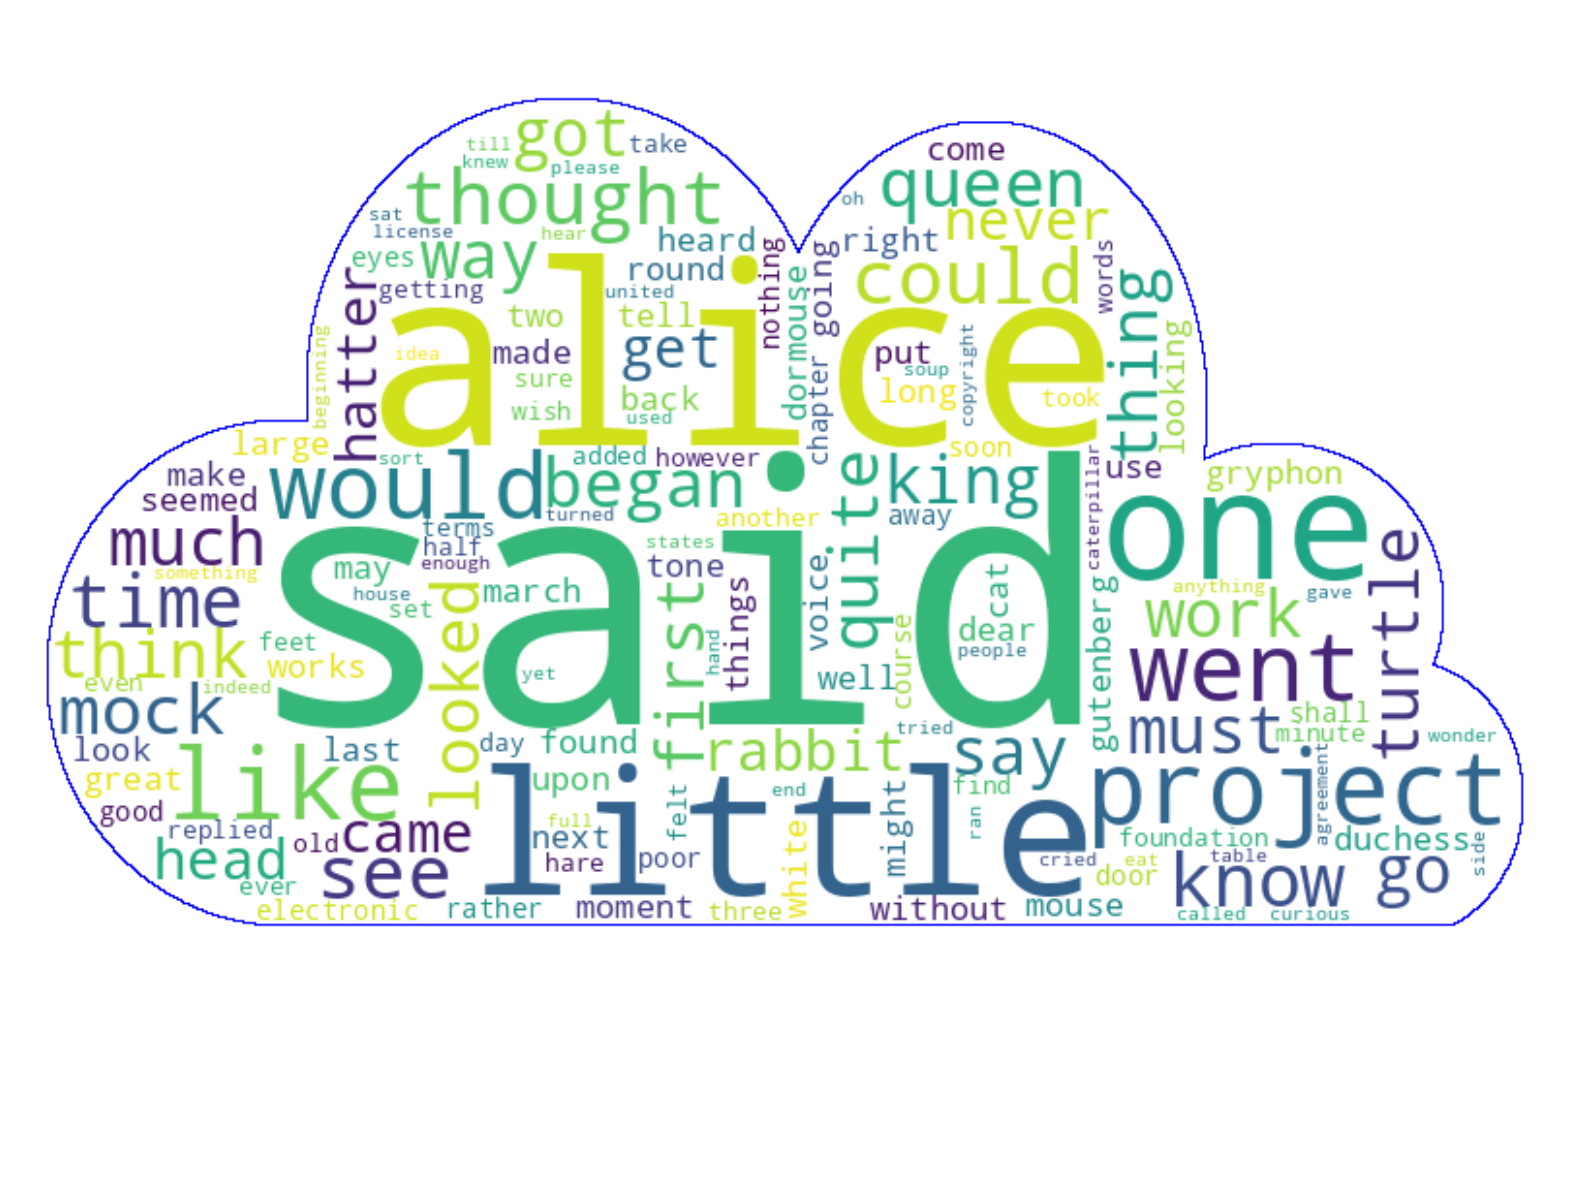

In [39]:
# Create a single wordcloud

text_path = Path.cwd() / '..' /'data' / 'books' / 'alice_in_wonderland_lewis_carroll.txt'
with text_path.open() as f:
    contents = f.read()
    counts = tokenize_and_count(contents)
    make_cloud(counts)

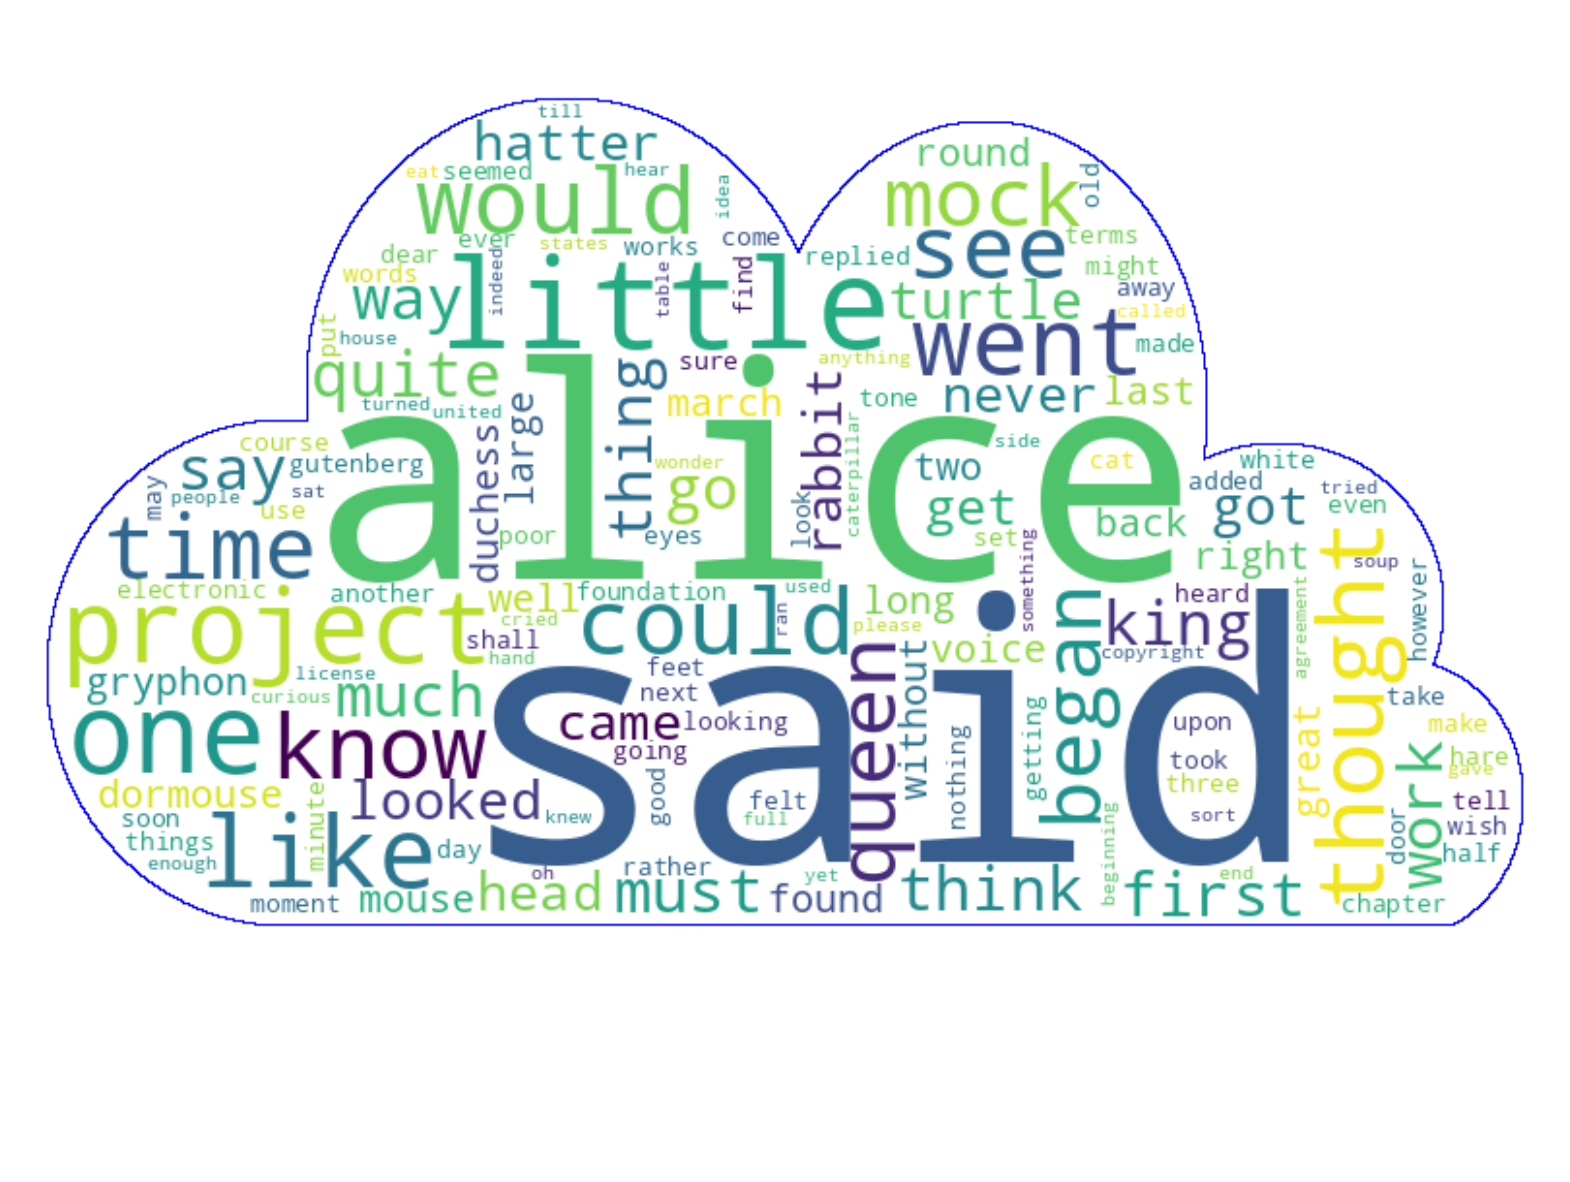

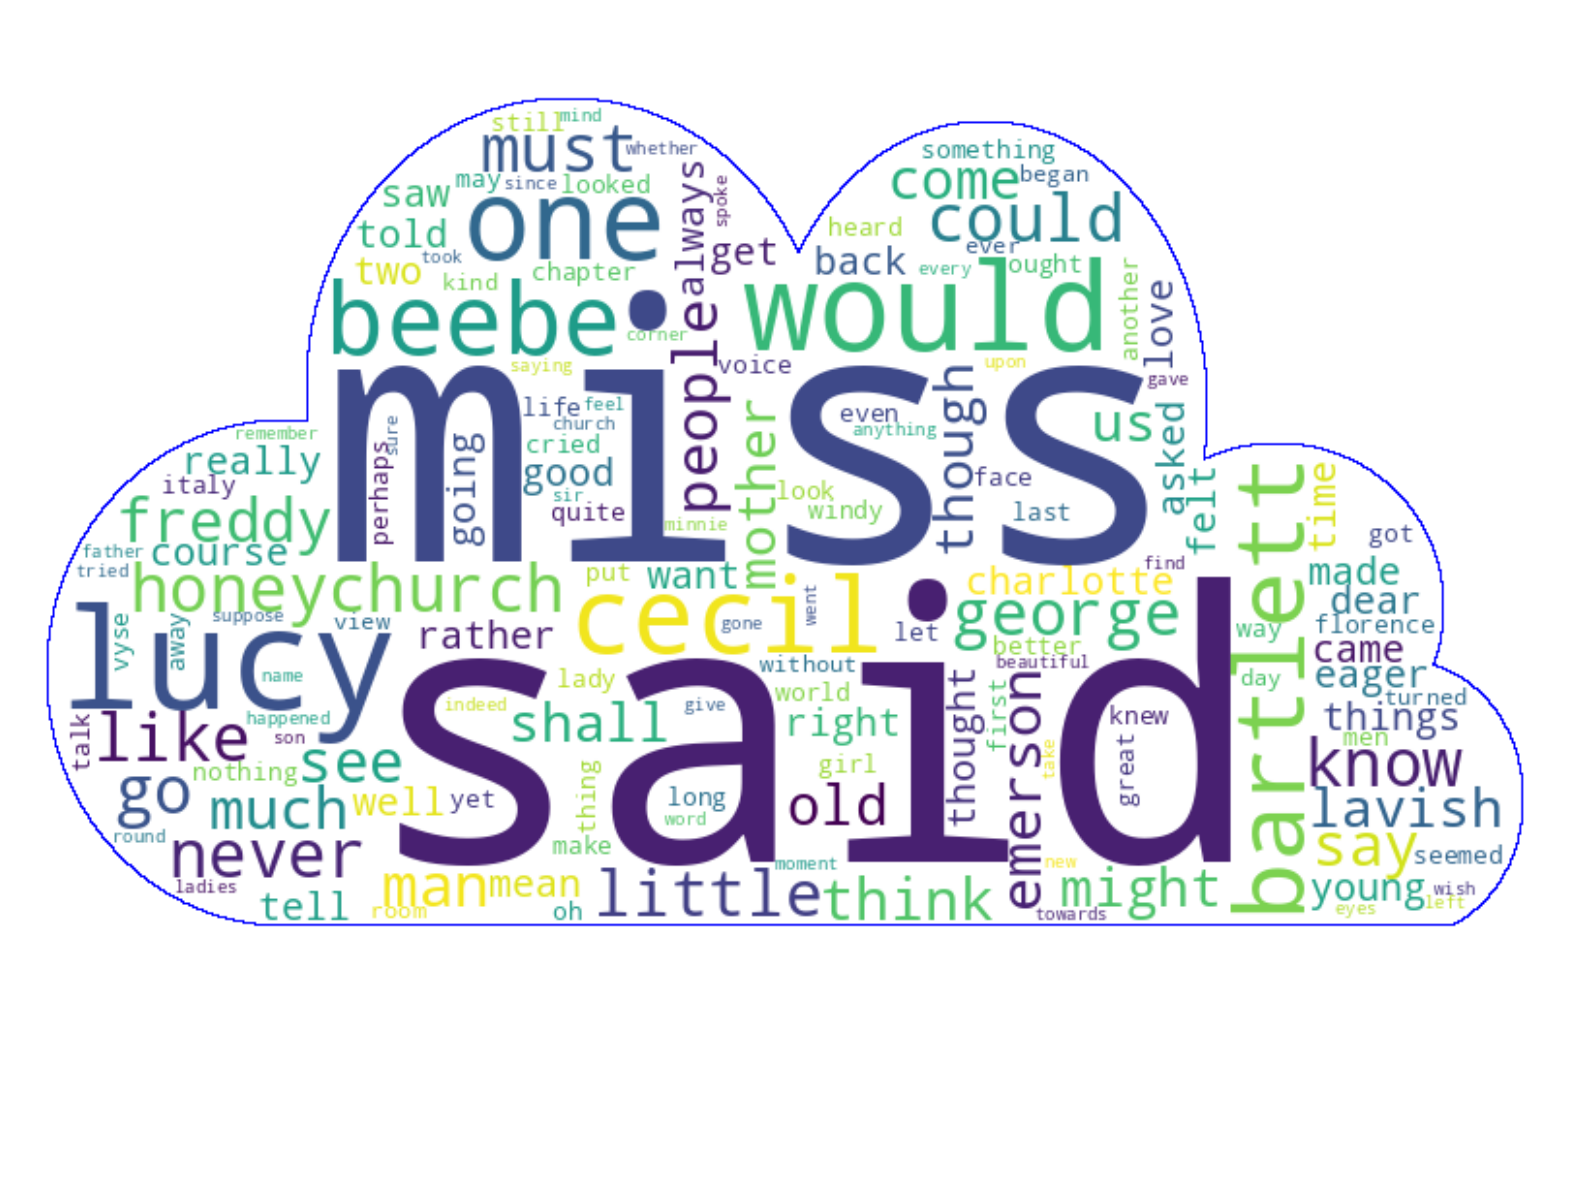

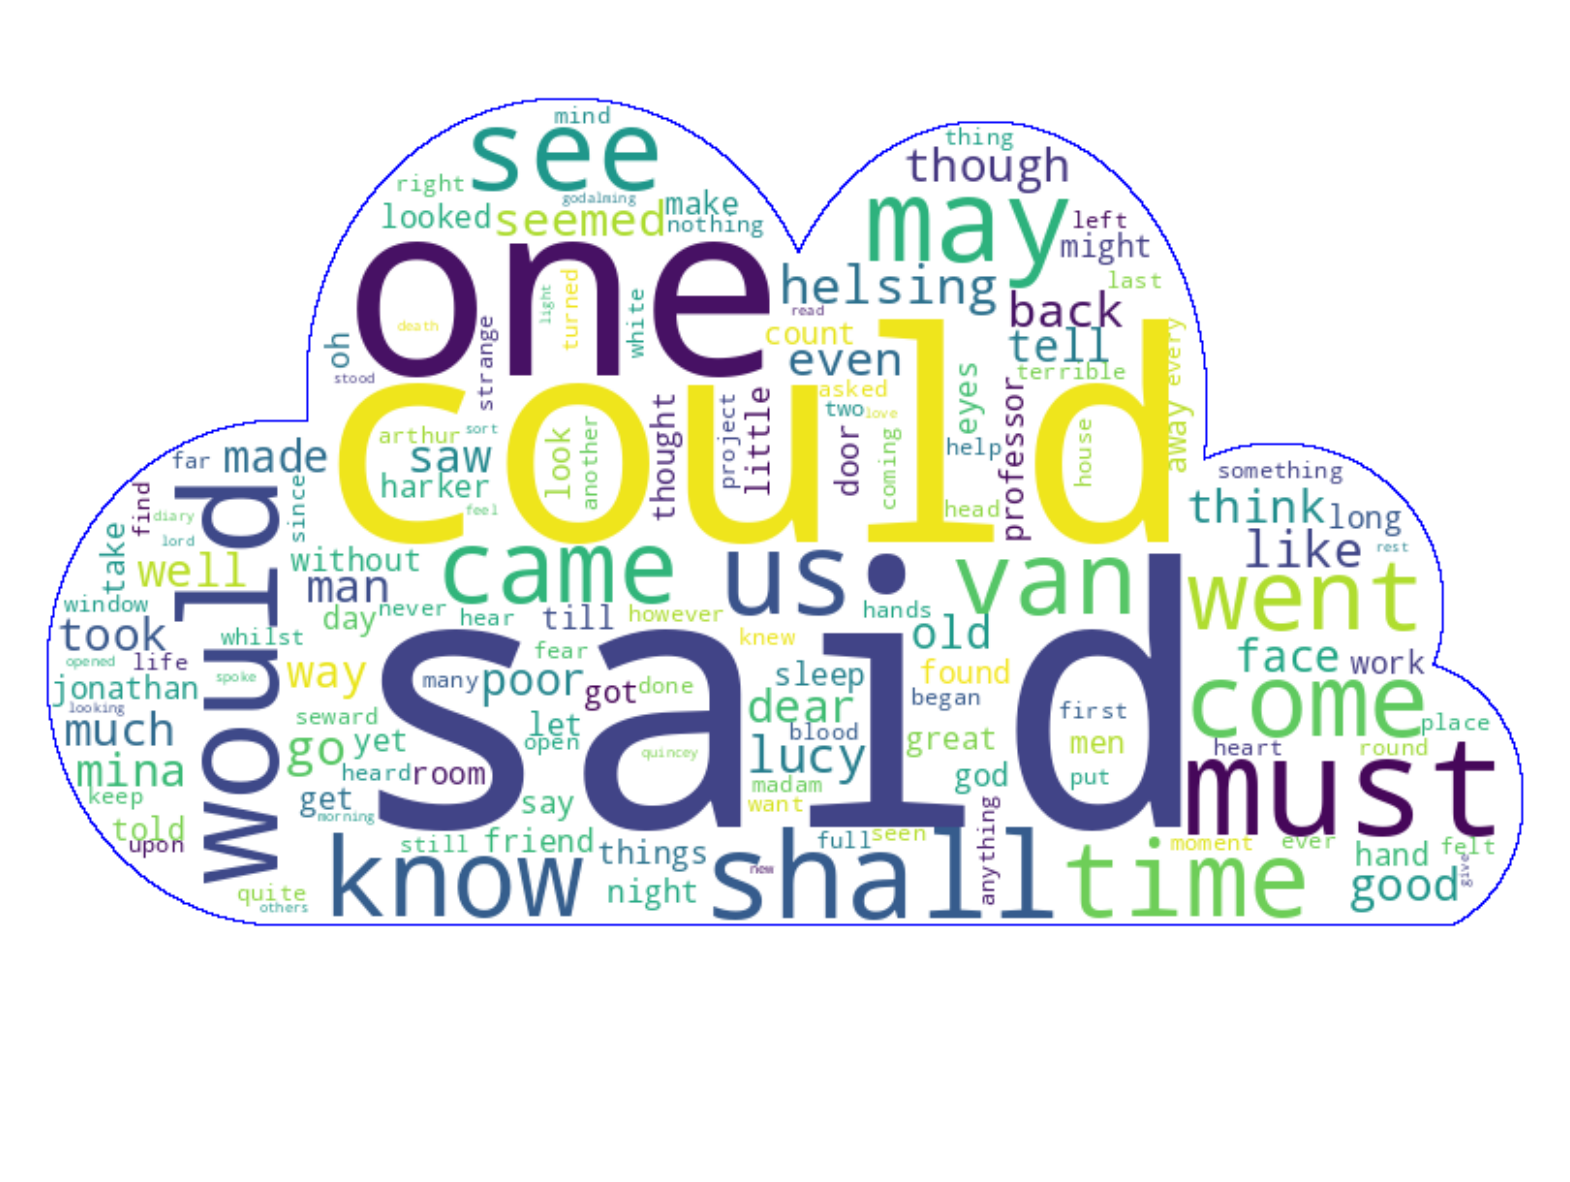

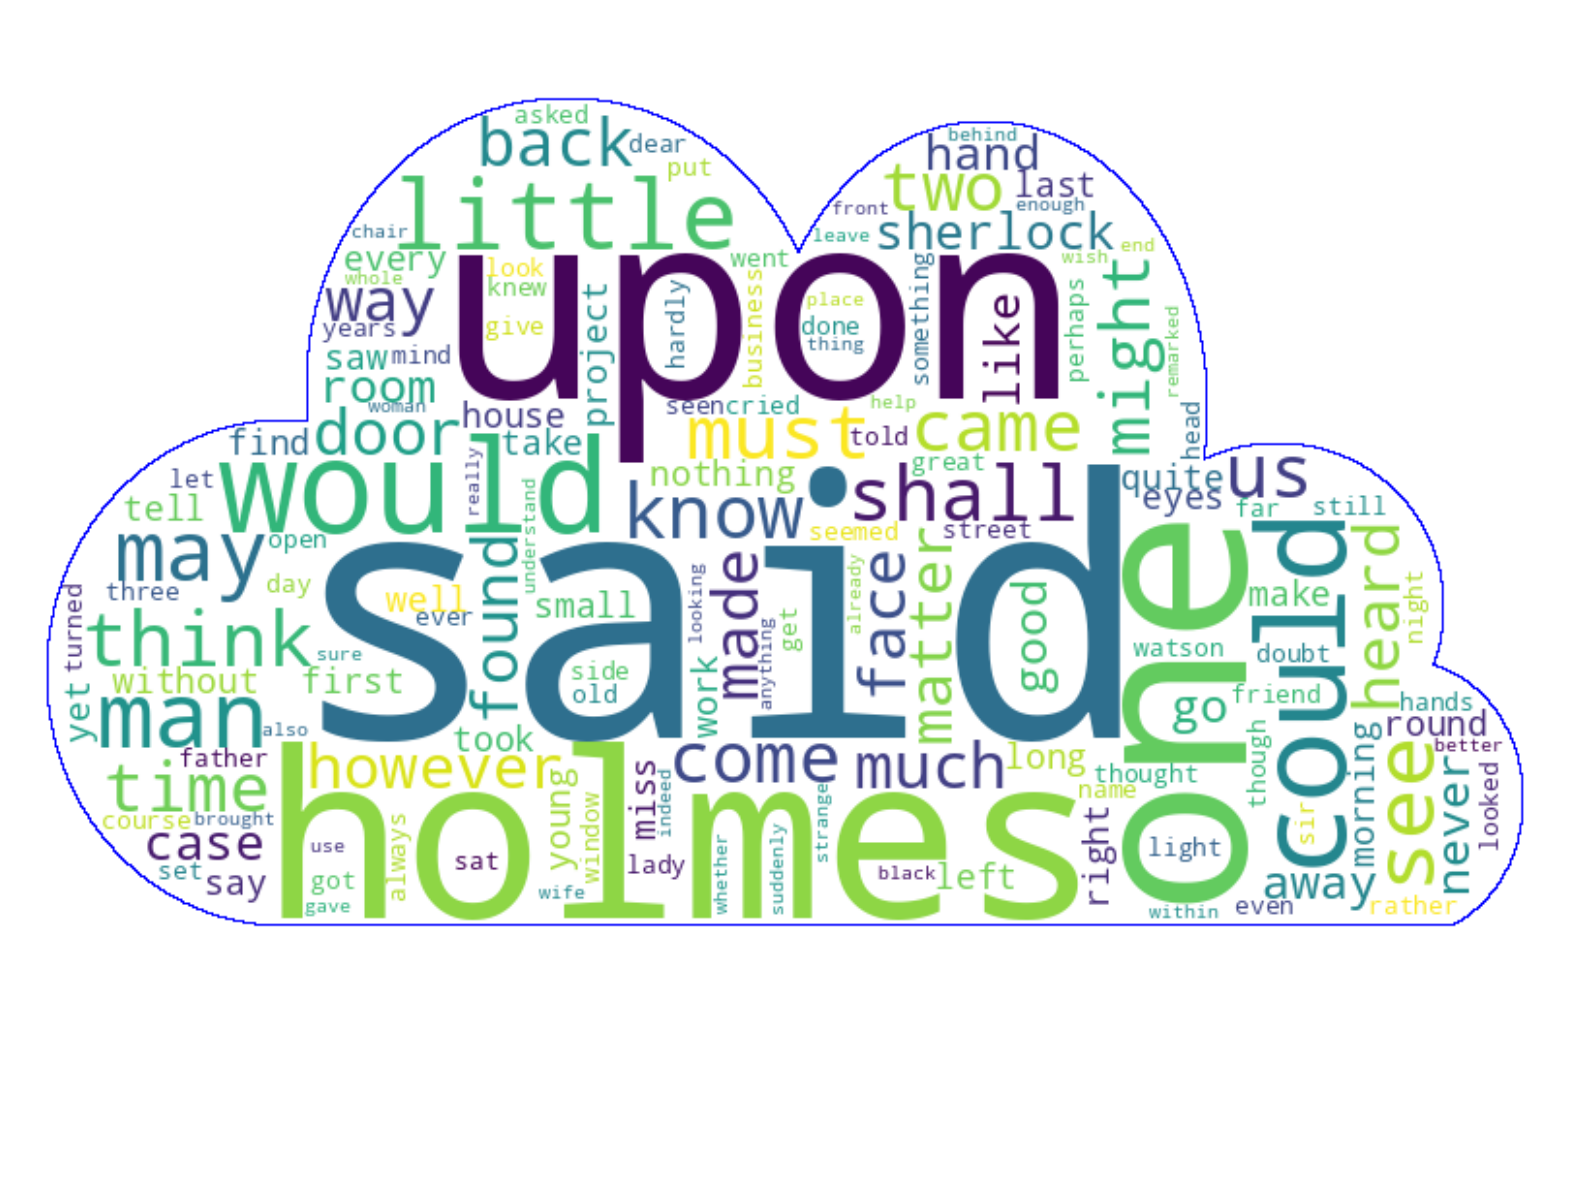

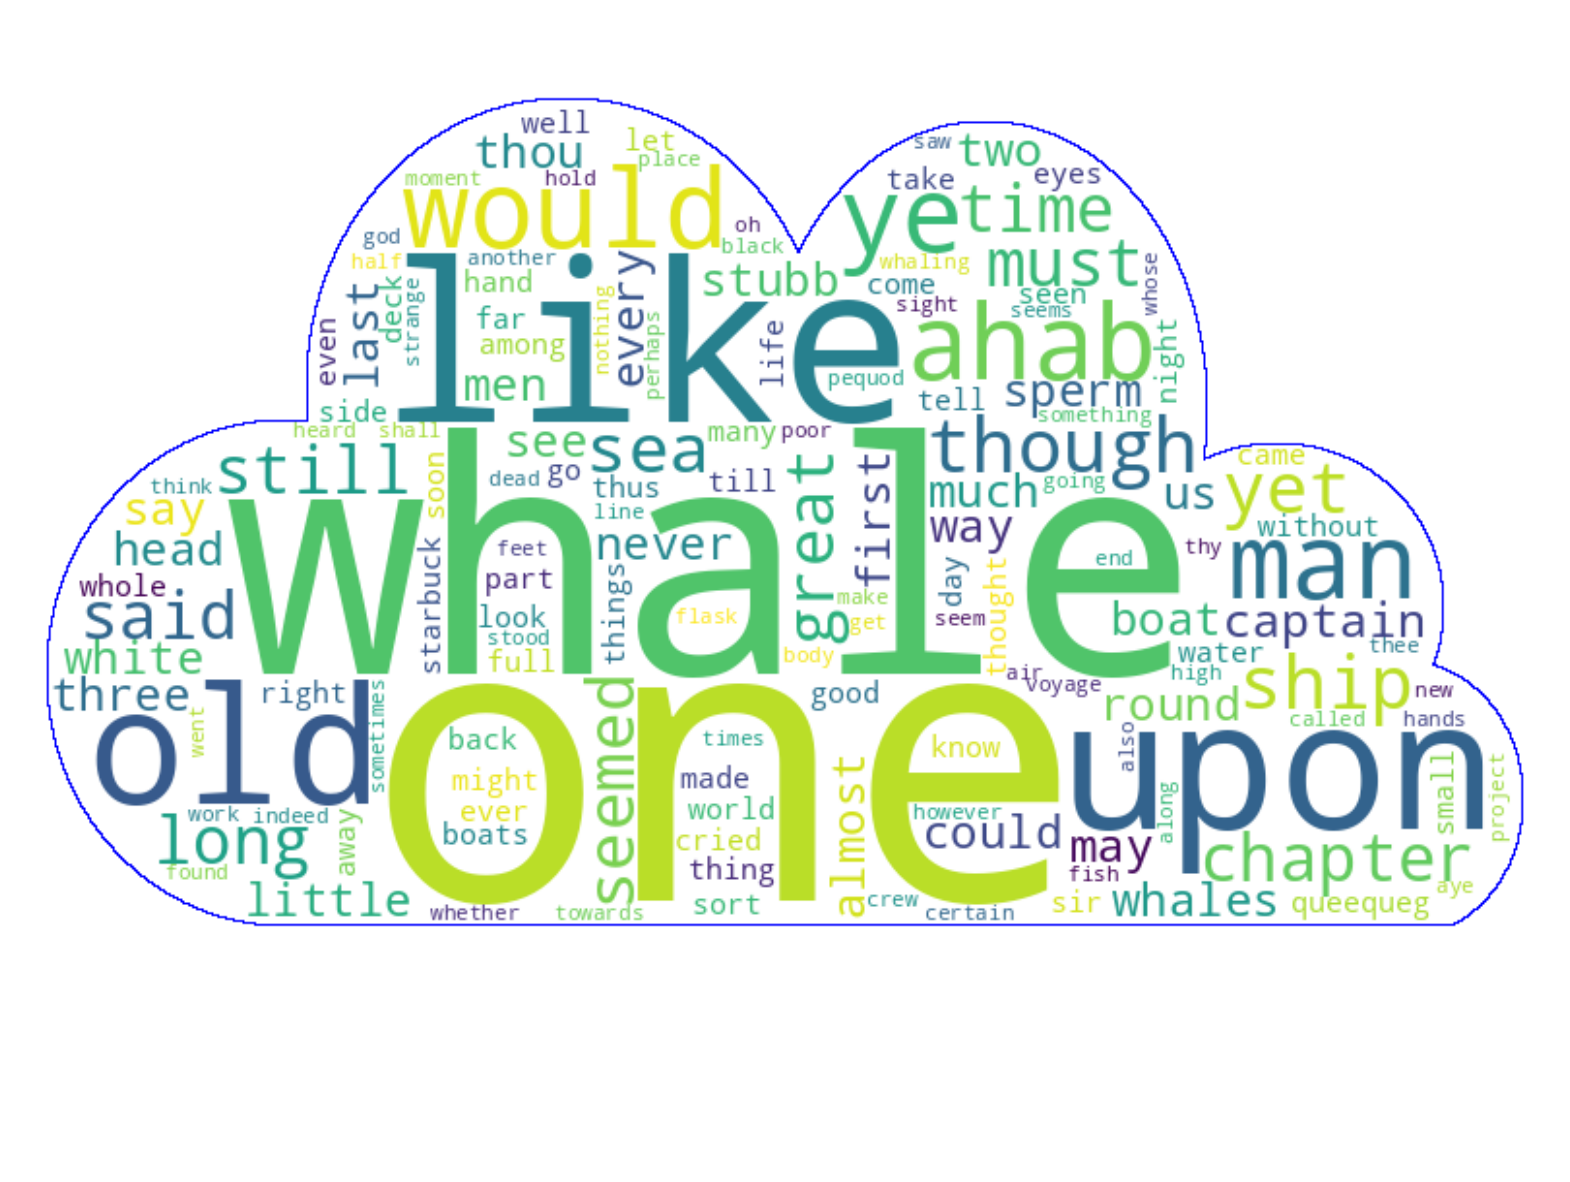

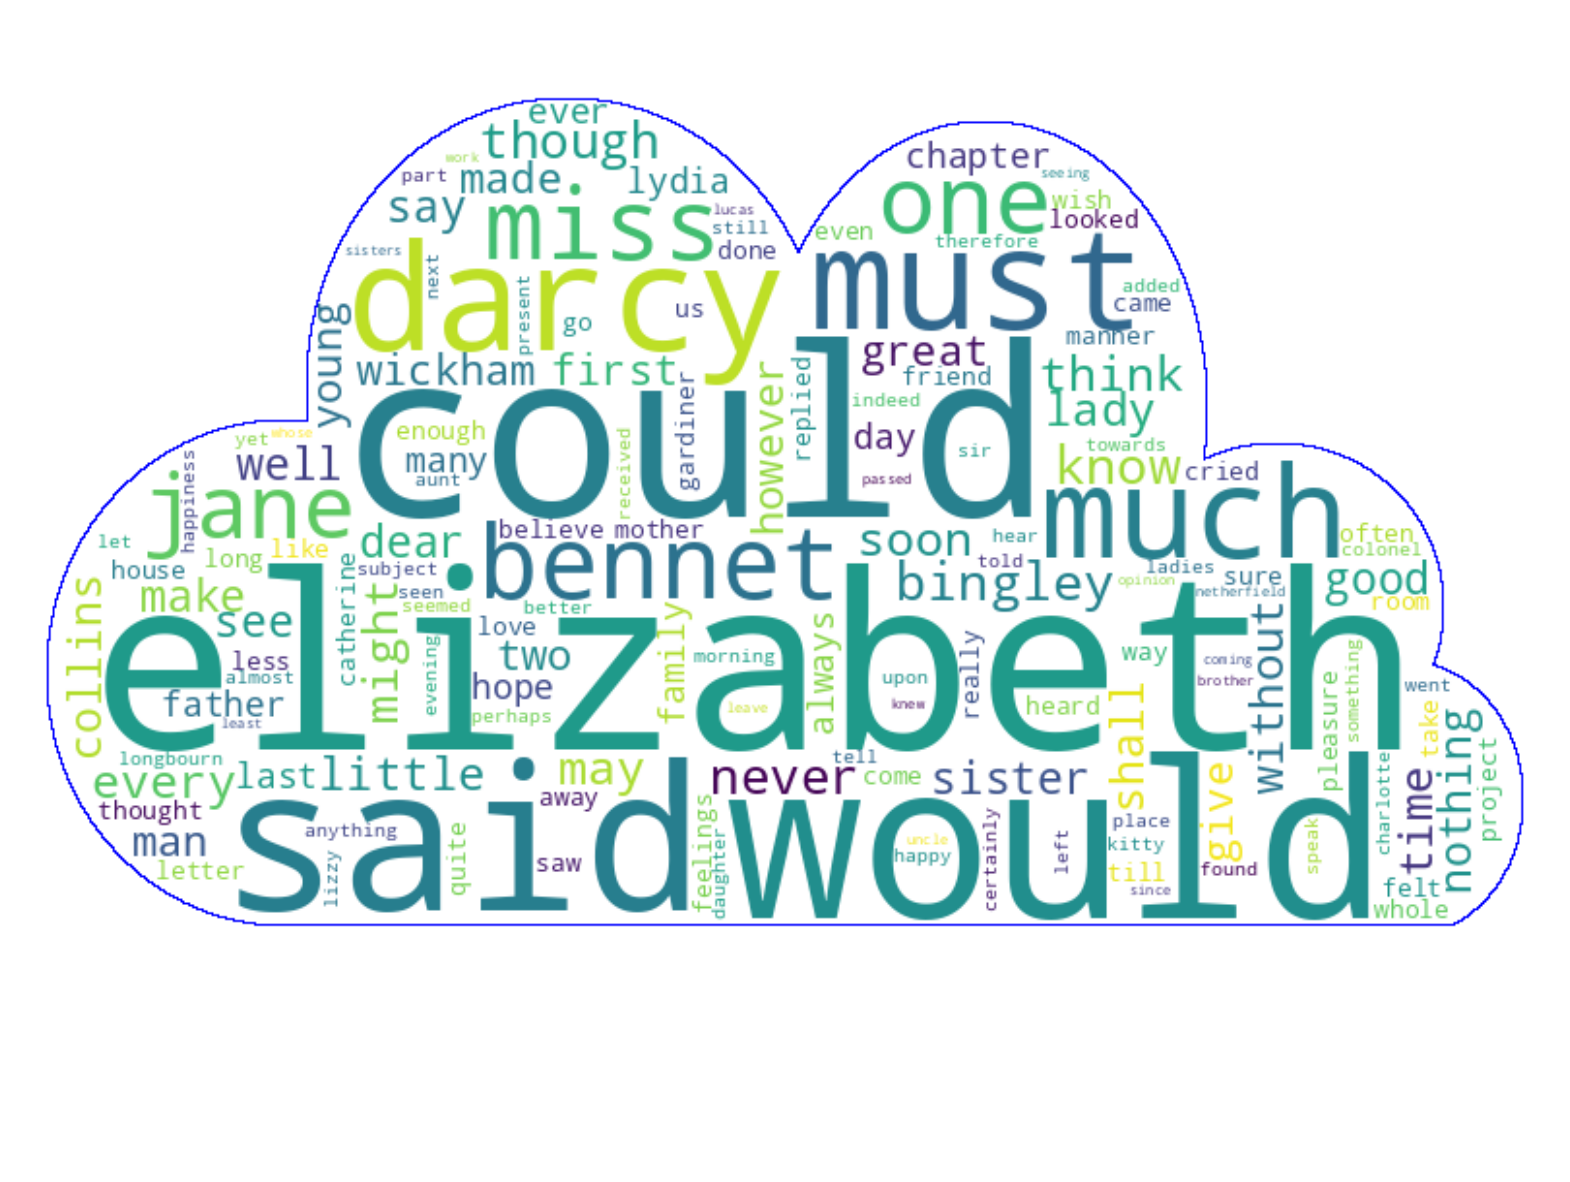

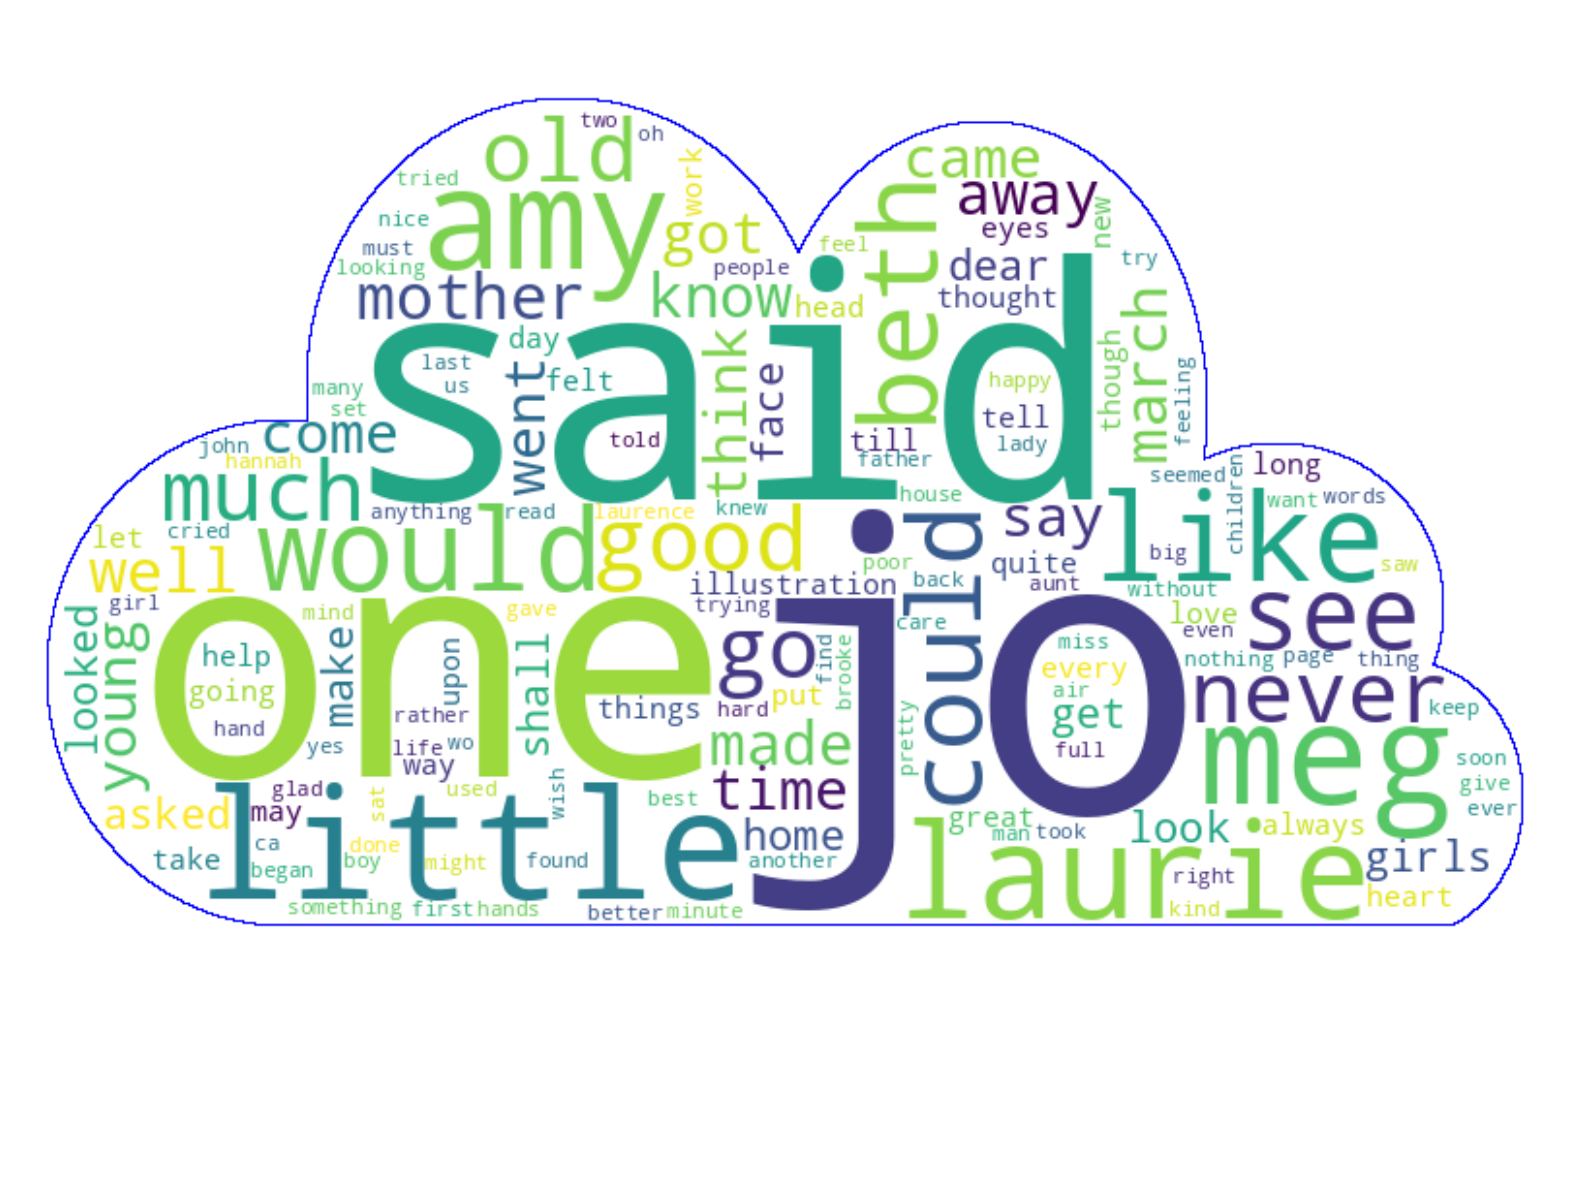

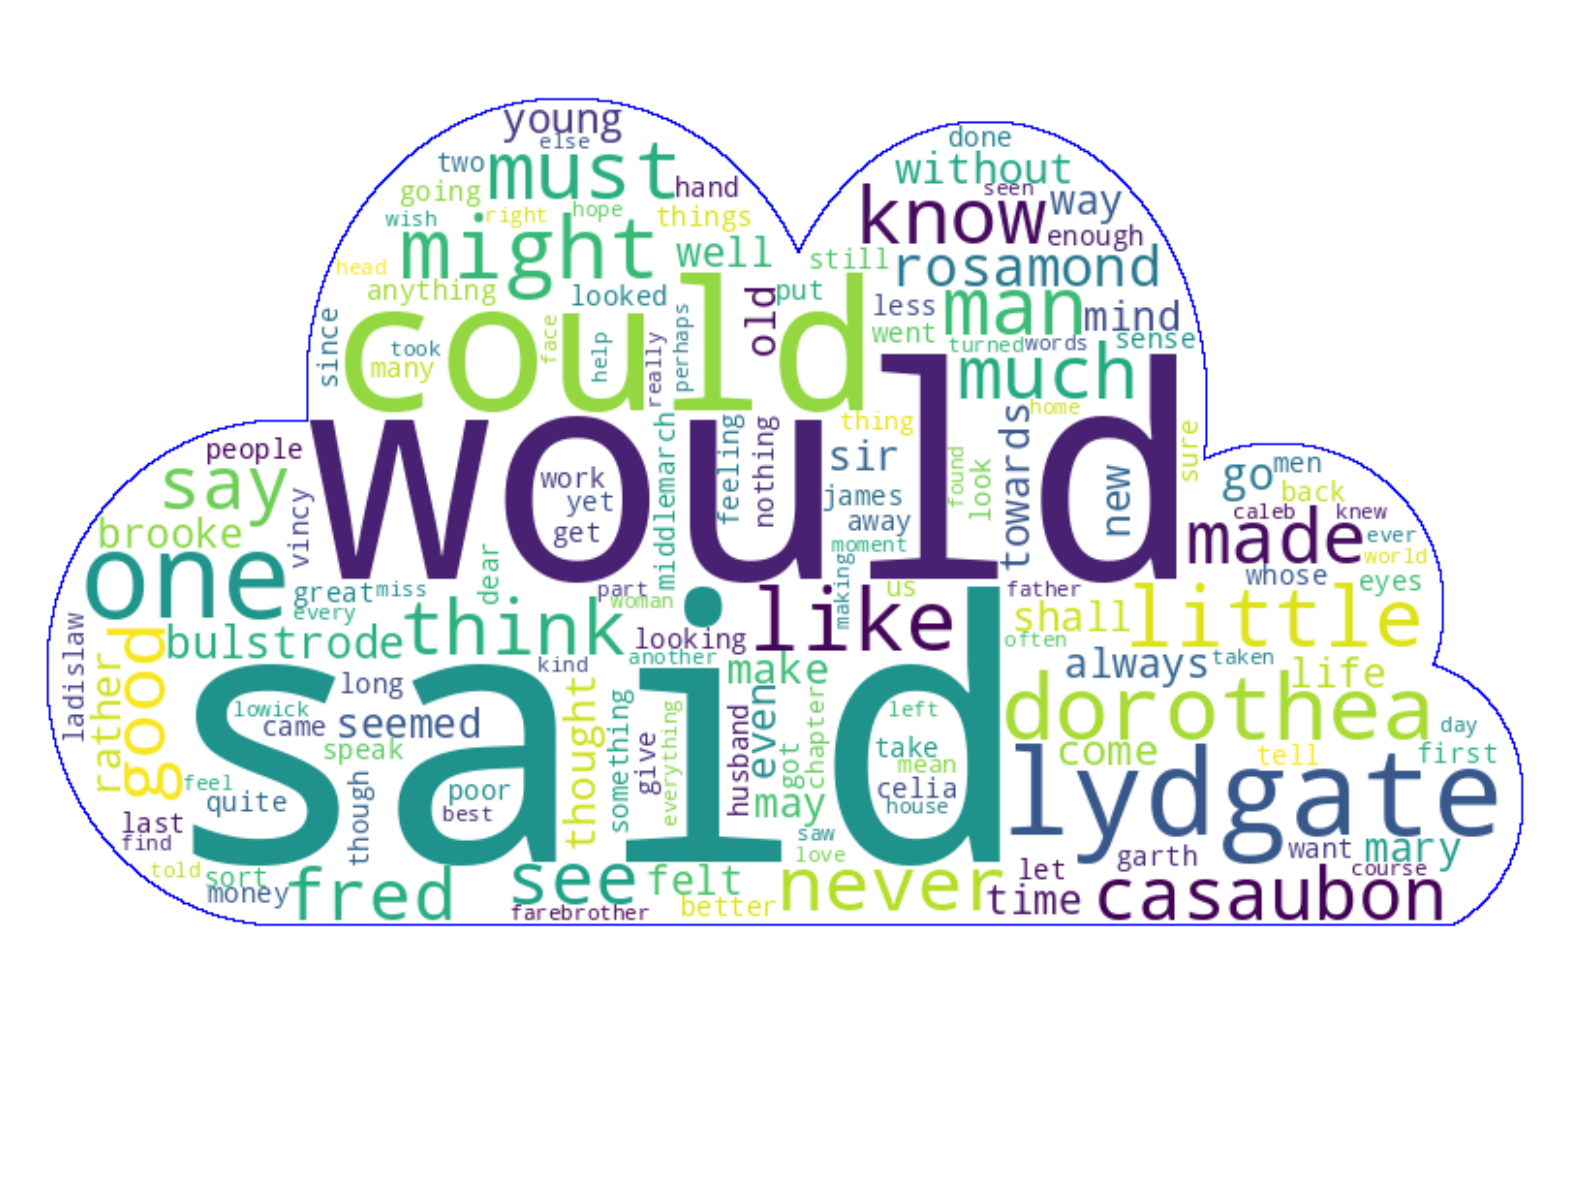

In [40]:
# Create wordclouds for every text in the directory

for file in input_dir.iterdir():
    if file.suffix == '.txt':
         with file.open() as f:
                contents = f.read()
                counts = tokenize_and_count(contents)
                make_cloud(counts)

___
## Lesson Complete

Congratulations! You have completed *Python Intermediate 3*.

### Start Next Lesson: [Python Intermediate 4](./python-intermediate-4.ipynb)

### Exercise Solutions
Here are a few solutions for exercises in this lesson.

In [41]:
# Checking if data/sample.html exists
new_path = Path.cwd() / '..' /'data' / 'sample.html'
new_path.exists()

False

In [42]:
# Print out 5000 characters of Bram Stoker's Dracula
dracula_path = Path.cwd() / '..' /'data' / 'books' / 'dracula_bram_stoker.txt'

with dracula_path.open() as f:
    contents = f.read()
    print(contents[:5000])

The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Dracula

Author: Bram Stoker

Release Date: October, 1995 [eBook #345]
[Most recently updated: October 5, 2022]

Language: English


Produced by: Chuck Greif and the Online Distributed Proofreading Team

*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***




                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

                

In [43]:
# Print out 500 lines of Bram Stoker's Dracula

dracula_path = Path.cwd() / '..' /'data' / 'books' / 'dracula_bram_stoker.txt'

with dracula_path.open() as f:
    contents = f.readlines()
    shortened = contents[:500]
    for line in shortened:
        print(line, end='')

The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Dracula

Author: Bram Stoker

Release Date: October, 1995 [eBook #345]
[Most recently updated: October 5, 2022]

Language: English


Produced by: Chuck Greif and the Online Distributed Proofreading Team

*** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***




                                DRACULA

                                  _by_

                              Bram Stoker

                        [Illustration: colophon]

                                NEW YORK

                

In [44]:
# Create a file that contains the sonnet string below
# Open the file and print it out line by line
# At the beginning of each line, print the appropriate line number

sonnet_string = """Then let not winter's ragged hand deface,
In thee thy summer, ere thou be distilled:
Make sweet some vial; treasure thou some place
With beauty's treasure ere it be self-killed.
That use is not forbidden usury,
Which happies those that pay the willing loan;
That's for thy self to breed another thee,
Or ten times happier, be it ten for one;
Ten times thy self were happier than thou art,
If ten of thine ten times refigured thee:
Then what could death do if thou shouldst depart,
Leaving thee living in posterity?
   Be not self-willed, for thou art much too fair
   To be death's conquest and make worms thine heir."""

# Create the file
new_file = Path.cwd() / '..' /'data' / 'sonnet.txt'
new_file.write_text(sonnet_string)

# Keeping track of lines and rhymes
i = 0
rhyme = 'ababcdcdefefgg'

# Read and print the sonnet line by line

with new_file.open() as f:
    for line in f:
        print(i+1, line[:-1], rhyme[i]) # The final character in each line is a linebreak so we slice it off
        i += 1

1 Then let not winter's ragged hand deface, a
2 In thee thy summer, ere thou be distilled: b
3 Make sweet some vial; treasure thou some place a
4 With beauty's treasure ere it be self-killed. b
5 That use is not forbidden usury, c
6 Which happies those that pay the willing loan; d
7 That's for thy self to breed another thee, c
8 Or ten times happier, be it ten for one; d
9 Ten times thy self were happier than thou art, e
10 If ten of thine ten times refigured thee: f
11 Then what could death do if thou shouldst depart, e
12 Leaving thee living in posterity? f
13    Be not self-willed, for thou art much too fair g
14    To be death's conquest and make worms thine heir g
